In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DSC_250_PROJECT/datasets/price/raw

/content/drive/.shortcut-targets-by-id/1HumP_mLSONElRLrftcvoorQeGMRqKdcH/DSC_250_PROJECT/datasets/price/raw


In [ ]:
%ls


AAPL.csv  BP.csv     D.csv     HSBC.csv         MMM.csv   PICO.csv   TM.csv   X_scaler.pkl
ABB.csv   BRK-A.csv  DHR.csv   IEP.csv          MO.csv    PM.csv     TOT.csv  X_test.npy
ABBV.csv  BSAC.csv   DIS.csv   index_test.npy   MRK.csv   PPL.csv    TSM.csv  X_train.npy
AEP.csv   BUD.csv    DUK.csv   index_train.npy  MSFT.csv  PTR.csv    UL.csv   yc_test.npy
AGFS.csv  CAT.csv    EXC.csv   INTC.csv         NEE.csv   RDS-B.csv  UN.csv   yc_train.npy
AMGN.csv  C.csv      FB.csv    JNJ.csv          NGG.csv   REX.csv    UNH.csv  y_scaler.pkl
AMZN.csv  CELG.csv   GD.csv    JPM.csv          NVS.csv   SLB.csv    UPS.csv  y_test.npy
BABA.csv  CHL.csv    GE.csv    KO.csv           ORCL.csv  SNP.csv    UTX.csv  y_train.npy
BAC.csv   CHTR.csv   GMRE.csv  LMT.csv          PCG.csv   SNY.csv    V.csv
BA.csv    CMCSA.csv  GOOG.csv  LSTM_3to1.h5     PCLN.csv  SO.csv     VZ.csv
BBL.csv   CODI.csv   HD.csv    MA.csv           PEP.csv   SPLP.csv   WFC.csv
BCH.csv   CSCO.csv   HON.csv   MCD.csv          PFE

In [ ]:
import pandas as pd

file_path = 'AAPL.csv'
df = pd.read_csv(file_path)


In [ ]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-09-04,95.108574,96.448570,94.928574,96.424286,87.121140,91973000
1,2012-09-05,96.510002,96.621429,95.657143,95.747147,86.509338,84093800
2,2012-09-06,96.167145,96.898575,95.828575,96.610001,87.288956,97799100
3,2012-09-07,96.864288,97.497147,96.538574,97.205711,87.827171,82416600
4,2012-09-10,97.207146,97.612854,94.585716,94.677139,85.542564,121999500
5,2012-09-11,95.015717,95.728569,93.785713,94.370003,85.265068,125995800
6,2012-09-12,95.264282,95.699997,93.714287,95.684288,86.452538,178058300
7,2012-09-13,96.767143,97.928574,96.395714,97.568573,88.155037,149590000
8,2012-09-14,98.565712,99.568573,98.269997,98.754288,89.226341,150118500
9,2012-09-17,99.907143,99.971428,99.230003,99.968575,90.323479,99507800


In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
datetime_series = pd.to_datetime(df['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
df = df.set_index(datetime_index)
df = df.sort_values(by='Date')
df = df.drop(columns='Date')

In [ ]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
2012-09-04,95.108574,96.448570,94.928574,96.424286,87.121140,91973000
2012-09-05,96.510002,96.621429,95.657143,95.747147,86.509338,84093800
2012-09-06,96.167145,96.898575,95.828575,96.610001,87.288956,97799100
2012-09-07,96.864288,97.497147,96.538574,97.205711,87.827171,82416600
2012-09-10,97.207146,97.612854,94.585716,94.677139,85.542564,121999500


In [ ]:
# df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'], format='%Y/%m/%d')

<ipython-input-8-9a5c7a8bd6db>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'], format='%Y/%m/%d')


In [ ]:
X_value = pd.DataFrame(df.iloc[:, :])
y_value = pd.DataFrame(df.iloc[:, 3])

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

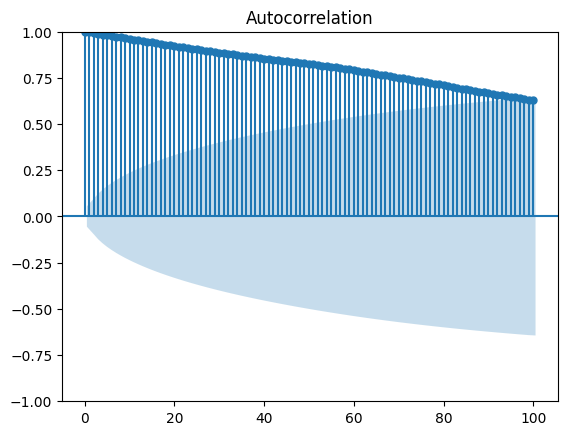

In [ ]:
# Autocorrelation Check
sm.graphics.tsa.plot_acf(y_value.squeeze(), lags=100)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaler.fit(X_value)
y_scaler.fit(y_value)

MinMaxScaler(feature_range=(-1, 1))

In [ ]:
X_scale_dataset = X_scaler.fit_transform(X_value)
y_scale_dataset = y_scaler.fit_transform(y_value)

In [ ]:
n_steps_in = 3
n_features = X_value.shape[1]
n_steps_out = 1

In [ ]:
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 3 and len(y_value) == 1:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)

In [ ]:
def predict_index(dataset, X_train, n_steps_in, n_steps_out):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index


In [ ]:
def split_train_test(data):
    train_size = round(len(X) * 0.7)
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

In [ ]:
X, y, yc = get_X_y(X_scale_dataset, y_scale_dataset)
X_train, X_test, = split_train_test(X)
y_train, y_test, = split_train_test(y)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(df, X_train, n_steps_in, n_steps_out)

In [ ]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('y_c_train shape: ', yc_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('y_c_test shape: ', yc_test.shape)
print('index_train shape:', index_train.shape)
print('index_test shape:', index_test.shape)

X shape:  (1255, 3, 6)
y shape:  (1255, 1)
X_train shape:  (878, 3, 6)
y_train shape:  (878, 1)
y_c_train shape:  (878, 3, 1)
X_test shape:  (377, 3, 6)
y_test shape:  (377, 1)
y_c_test shape:  (377, 3, 1)
index_train shape: (878,)
index_test shape: (377,)


In [ ]:
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
np.save("yc_train.npy", yc_train)
np.save("yc_test.npy", yc_test)
np.save('index_train.npy', index_train)
np.save('index_test.npy', index_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


In [ ]:
X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)


In [ ]:
#Parameters
LR = 0.001
BATCH_SIZE = 64
N_EPOCH = 50

input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

In [ ]:
def basic_lstm(input_dim, feature_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
    model.add(Dense(64))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(lr = LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.show()

    return model


Epoch 1/50
14/14 - 8s - loss: 0.0783 - val_loss: 0.0090 - 8s/epoch - 603ms/step
Epoch 2/50
14/14 - 0s - loss: 0.0199 - val_loss: 0.0122 - 464ms/epoch - 33ms/step
Epoch 3/50
14/14 - 0s - loss: 0.0333 - val_loss: 0.0889 - 462ms/epoch - 33ms/step
Epoch 4/50
14/14 - 1s - loss: 0.0598 - val_loss: 0.0180 - 514ms/epoch - 37ms/step
Epoch 5/50
14/14 - 1s - loss: 0.0441 - val_loss: 0.0236 - 527ms/epoch - 38ms/step
Epoch 6/50
14/14 - 0s - loss: 0.0484 - val_loss: 0.0055 - 499ms/epoch - 36ms/step
Epoch 7/50
14/14 - 1s - loss: 0.0084 - val_loss: 0.0021 - 507ms/epoch - 36ms/step
Epoch 8/50
14/14 - 0s - loss: 0.0043 - val_loss: 0.0023 - 413ms/epoch - 30ms/step
Epoch 9/50
14/14 - 0s - loss: 0.0022 - val_loss: 0.0014 - 245ms/epoch - 18ms/step
Epoch 10/50
14/14 - 0s - loss: 0.0019 - val_loss: 0.0016 - 239ms/epoch - 17ms/step
Epoch 11/50
14/14 - 0s - loss: 0.0016 - val_loss: 0.0014 - 280ms/epoch - 20ms/step
Epoch 12/50
14/14 - 0s - loss: 0.0016 - val_loss: 0.0014 - 253ms/epoch - 18ms/step
Epoch 13/50
14/

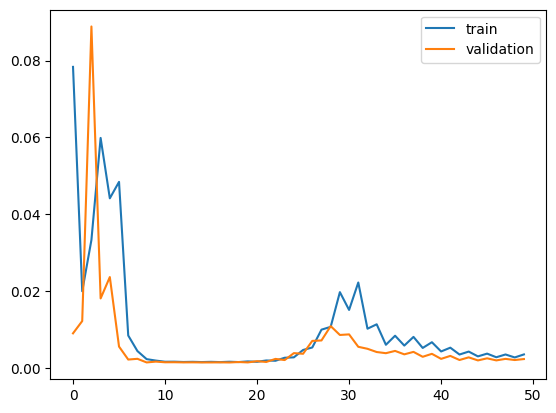

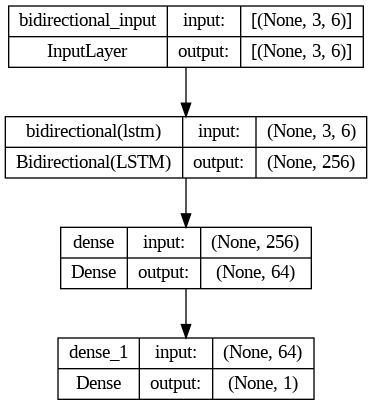

In [ ]:
model = basic_lstm(input_dim, feature_size)
plot_model(model, to_file='lstm_diagram.png', show_shapes=True, show_layer_names=True)

In [ ]:
from math import sqrt

Epoch 1/50
14/14 - 9s - loss: 0.1067 - val_loss: 0.0257 - 9s/epoch - 640ms/step
Epoch 2/50
14/14 - 0s - loss: 0.0473 - val_loss: 0.0213 - 226ms/epoch - 16ms/step
Epoch 3/50
14/14 - 0s - loss: 0.0346 - val_loss: 0.0164 - 233ms/epoch - 17ms/step
Epoch 4/50
14/14 - 0s - loss: 0.0170 - val_loss: 0.0116 - 238ms/epoch - 17ms/step
Epoch 5/50
14/14 - 0s - loss: 0.0204 - val_loss: 0.0045 - 289ms/epoch - 21ms/step
Epoch 6/50
14/14 - 0s - loss: 0.0116 - val_loss: 0.0066 - 256ms/epoch - 18ms/step
Epoch 7/50
14/14 - 0s - loss: 0.0105 - val_loss: 0.0028 - 256ms/epoch - 18ms/step
Epoch 8/50
14/14 - 0s - loss: 0.0054 - val_loss: 0.0030 - 273ms/epoch - 19ms/step
Epoch 9/50
14/14 - 0s - loss: 0.0050 - val_loss: 0.0025 - 267ms/epoch - 19ms/step
Epoch 10/50
14/14 - 0s - loss: 0.0036 - val_loss: 0.0026 - 253ms/epoch - 18ms/step
Epoch 11/50
14/14 - 0s - loss: 0.0042 - val_loss: 0.0028 - 229ms/epoch - 16ms/step
Epoch 12/50
14/14 - 0s - loss: 0.0036 - val_loss: 0.0029 - 225ms/epoch - 16ms/step
Epoch 13/50
14/

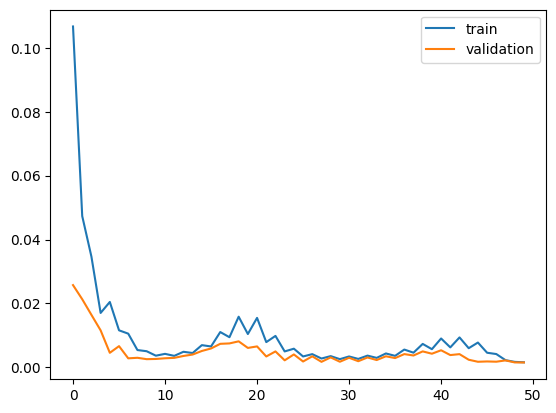

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 256)               138240    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 154753 (604.50 KB)
Trainable params: 154753 (604.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


None
0.03867832182310132


In [ ]:
model = basic_lstm(input_dim, feature_size)
model.save('LSTM_3to1.h5')
print(model.summary())

yhat = model.predict(X_test, verbose=0)
#print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)

In [ ]:
def plot_traindataset_result(X_train, y_train):


    train_yhat = model.predict(X_train, verbose=0)

    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("index_train.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
    #
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)
    #
    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Train RMSE -- ', RMSE)

    return RMSE

In [ ]:
# %% --------------------------------------- Plot the TEST result  -----------------------------------------------------------------
def plot_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("index_test.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    Input_Before = '2020-01-01'
    predict_result = predict_result.loc[predict_result.index < Input_Before]
    real_price = real_price.loc[real_price.index < Input_Before]

    print(predict_result.tail(10))

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE -- ', RMSE)

    return RMSE


In [ ]:
from pickle import dump, load

In [ ]:
dump(X_scaler, open('X_scaler.pkl', 'wb'))
dump(y_scaler, open('y_scaler.pkl', 'wb'))

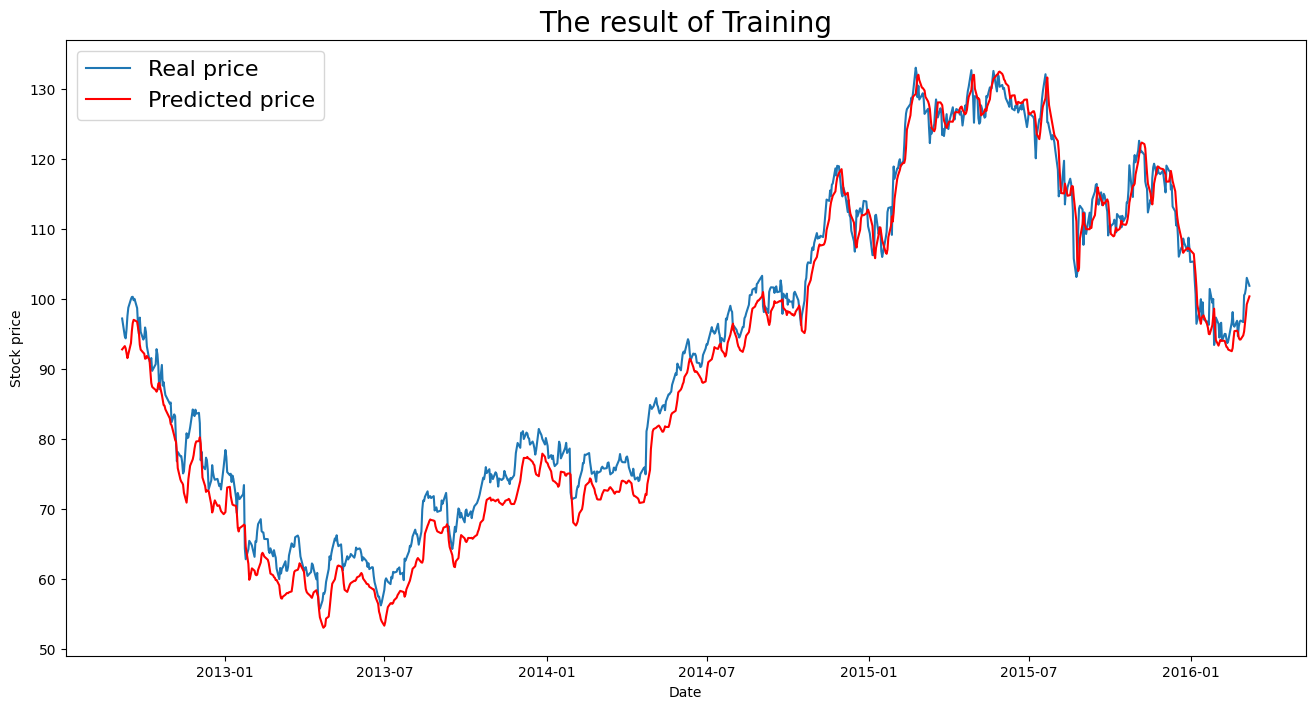

----- Train_RMSE_LSTM ----- 3.353564163467386
            predicted_price  predicted_price  predicted_price  \
2017-08-21              NaN              NaN              NaN   
2017-08-22              NaN              NaN              NaN   
2017-08-23              NaN              NaN              NaN   
2017-08-24              NaN              NaN              NaN   
2017-08-25              NaN              NaN              NaN   
2017-08-28              NaN              NaN              NaN   
2017-08-29              NaN              NaN              NaN   
2017-08-30              NaN              NaN              NaN   
2017-08-31              NaN              NaN              NaN   
2017-09-01              NaN              NaN              NaN   

            predicted_price  predicted_price  predicted_price  \
2017-08-21              NaN              NaN              NaN   
2017-08-22              NaN              NaN              NaN   
2017-08-23              NaN              Na

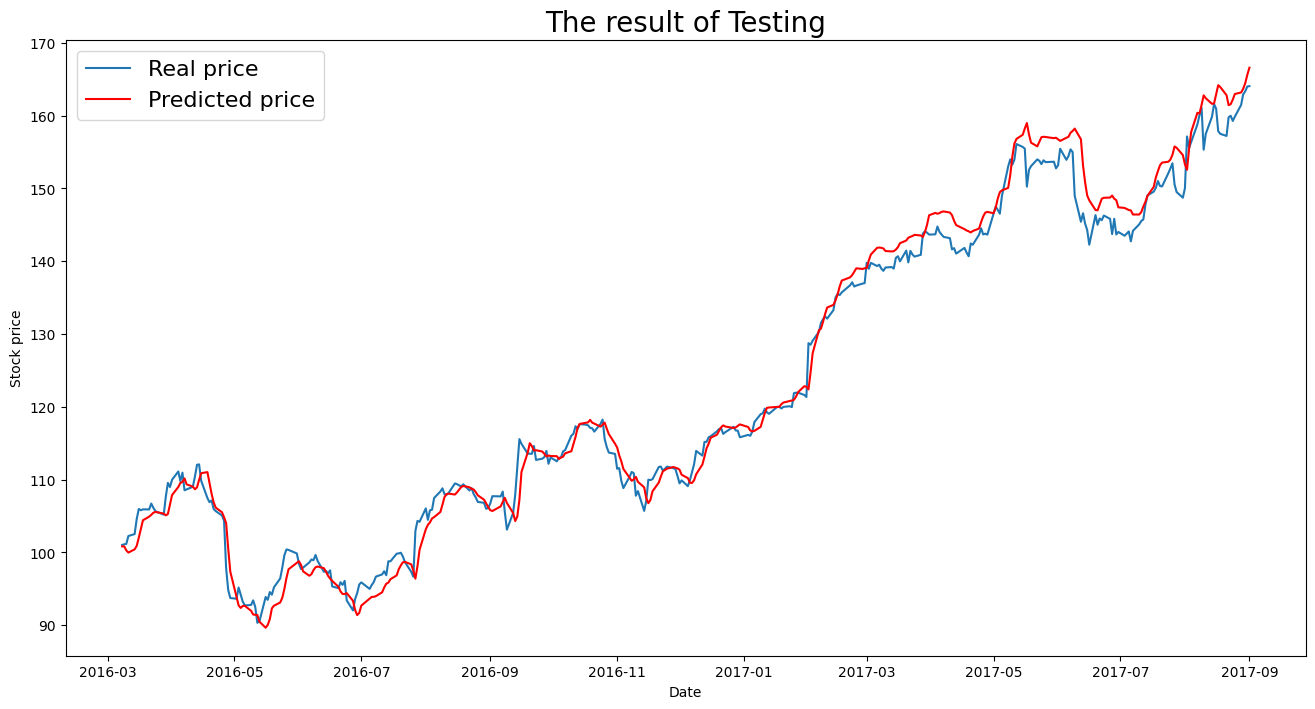

----- Test_RMSE_LSTM ----- 2.5709797034112087


In [ ]:
train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_LSTM -----", train_RMSE)

test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_LSTM -----", test_RMSE)

In [ ]:
df['7_d_avg'] = df['Close'].rolling(window=7).mean()
df['10_d_avg'] = df['Close'].rolling(window=10).mean()
df['50_d_avg'] = df['Close'].rolling(window=50).mean()

In [ ]:
# df = df.drop('200_d_avg', axis=1)
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume,7_d_avg,10_d_avg,50_d_avg
0,2012-09-04,0.362825,0.364963,0.367482,0.375340,0.319920,0.227562,NaN,NaN,NaN
1,2012-09-05,0.375638,0.366566,0.374189,0.369085,0.314511,0.205288,NaN,NaN,NaN
2,2012-09-06,0.372504,0.369136,0.375768,0.377055,0.321403,0.244032,NaN,NaN,NaN
3,2012-09-07,0.378878,0.374685,0.382305,0.382558,0.326161,0.200546,NaN,NaN,NaN
4,2012-09-10,0.382012,0.375758,0.364325,0.359201,0.305965,0.312446,NaN,NaN,NaN
5,2012-09-11,0.361976,0.358288,0.356960,0.356364,0.303511,0.323743,NaN,NaN,NaN
6,2012-09-12,0.364249,0.358023,0.356302,0.368504,0.314009,0.470921,0.369730,NaN,NaN
7,2012-09-13,0.377989,0.378686,0.380989,0.385910,0.329060,0.390443,0.371240,NaN,NaN
8,2012-09-14,0.394433,0.393891,0.398245,0.396862,0.338531,0.391937,0.375208,NaN,NaN
9,2012-09-17,0.406698,0.397626,0.407084,0.408078,0.348230,0.248862,0.379640,0.377896,NaN


In [ ]:
df['returns'] = ((df['Adj Close'] / df['Adj Close'].shift(1)) - 1) * 100

In [ ]:
df.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,7_d_avg,10_d_avg,50_d_avg,returns
0,2012-09-04,0.362825,0.364963,0.367482,0.375340,0.319920,0.227562,NaN,NaN,NaN,NaN
1,2012-09-05,0.375638,0.366566,0.374189,0.369085,0.314511,0.205288,NaN,NaN,NaN,-1.690598
2,2012-09-06,0.372504,0.369136,0.375768,0.377055,0.321403,0.244032,NaN,NaN,NaN,2.191373
3,2012-09-07,0.378878,0.374685,0.382305,0.382558,0.326161,0.200546,NaN,NaN,NaN,1.480390
4,2012-09-10,0.382012,0.375758,0.364325,0.359201,0.305965,0.312446,NaN,NaN,NaN,-6.192267
5,2012-09-11,0.361976,0.358288,0.356960,0.356364,0.303511,0.323743,NaN,NaN,NaN,-0.801782
6,2012-09-12,0.364249,0.358023,0.356302,0.368504,0.314009,0.470921,0.369730,NaN,NaN,3.458743
7,2012-09-13,0.377989,0.378686,0.380989,0.385910,0.329060,0.390443,0.371240,NaN,NaN,4.793087
8,2012-09-14,0.394433,0.393891,0.398245,0.396862,0.338531,0.391937,0.375208,NaN,NaN,2.878118
9,2012-09-17,0.406698,0.397626,0.407084,0.408078,0.348230,0.248862,0.379640,0.377896,NaN,2.865062
